In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use("classic")

## Reading ,merging  and understanding the required dataset

df1=pd.read_csv('Customer_and_bank details_p1.csv')
df2=pd.read_csv('Customer_campaign_details_p1.csv')
df3=pd.read_csv('Customer_Postal_Code_details.csv')
df4=pd.read_csv('Customer_Response_data_p1.csv')
df5=pd.read_csv('Customer_social_economic_data_p1.csv')
region=pd.read_csv("Region_code_master.csv")
city=pd.read_csv("City_Master.csv")
state=pd.read_csv("State_Master.csv")
df3=df3.rename({'customer_id':'Customer_id'},axis='columns')
df6=pd.merge(df1,df2, on='Customer_id', how='inner')
df7=pd.merge(df4,df5, on='Customer_id', how='inner')
df8=pd.merge(df6,df7, on='Customer_id', how='inner')
df=pd.merge(df8,df3,on='Customer_id' ,how='inner')
df=pd.merge(df,state,on='State_Code')
df=pd.merge(df,city,on='City_Code')
df=df.drop(['State_Code_y','Region_Code_y'],axis=1)
df=df.rename({'Region_Code_x':'Region_Code','State_Code_x':'State_Code','y':'Response_Target'},axis=1)
df1=pd.merge(state,region,on="Region_Code")
df=pd.merge(df,df1,on='State_Code')
df=df.drop(['State_Name_y','Region_Code_y'],axis=1)
df_data=df.drop(['Customer_id','Region_Code_x','State_Code','City_Code','Postal Code'],axis=1)
df_data['Response_Target']=df_data['Response_Target'].map(lambda x:1 if x=='yes' else 0)



In [2]:
def con(x):
    if x==999:
        return 'no'
    else:
        return 'yes'

df_data['pdays']=df_data['pdays'].map(con)

In [3]:
def get_duration(x):
    if 0<x<200:
        return 'LOW'
    elif 200<=x<700:
        return 'MEDIUM'
    else:
        return 'HIGH'
df_data['duration']=df_data.duration.map(get_duration)

In [4]:
age_median=df_data.age.median()
campaign_median=df_data.campaign.median()

df_data['age'].loc[(df_data['age']>df_data.age.quantile(0.99))]=age_median
df_data['campaign'].loc[(df_data['campaign']>df_data.campaign.quantile(0.99))]=campaign_median

In [5]:
df_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
2,32,admin.,single,university.degree,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
3,36,services,married,high.school,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
4,31,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.856,5191.0,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,housemaid,divorced,high.school,no,no,no,cellular,sep,wed,...,nonexistent,0,-3.4,92.379,-29.8,0.753,5017.5,North Dakota,Fargo,Central
37080,58,unknown,married,basic.4y,no,yes,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Wyoming,Cheyenne,West
37081,43,unemployed,divorced,basic.9y,no,no,no,cellular,jul,mon,...,nonexistent,0,1.4,93.918,-42.7,4.962,5228.1,Wyoming,Cheyenne,West
37082,37,admin.,single,high.school,no,no,no,cellular,apr,thu,...,failure,0,-1.8,93.075,-47.1,1.410,5099.1,Wyoming,Cheyenne,West


In [6]:
df=df_data.copy()

In [7]:
df.replace('unknown',np.NaN,inplace=True)
df.isnull().sum()

age                   0
job                 306
marital              72
education          1549
default            7700
housing             882
loan                882
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
Response_Target       0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
State_Name_x          0
City_Name             0
Region_Name           0
dtype: int64

In [8]:
df['default']= df['default'].fillna('unknown')
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
Response_Target    0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
State_Name_x       0
City_Name          0
Region_Name        0
dtype: int64

In [10]:

lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      12520
middle.school          11260
high.school             8542
professional.course     4746
illiterate                16
Name: education, dtype: int64

In [11]:

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict)

In [12]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)



In [13]:
df1=df.copy()


In [14]:
numerical=df1.select_dtypes(include='int64').columns
flt=df1.select_dtypes(include='float64').columns.to_list()
flt

numerical=numerical.drop(['month','day_of_week','Response_Target']).to_list()

numerical=np.concatenate([numerical,flt])

for num in numerical:
    df1[num]=(df1[num]-df1[num].mean())/df1[num].std()
    

In [15]:
cat=df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])


In [16]:
df1['month']=df1['month'].astype('object')
df1['day_of_week']=df1['day_of_week'].astype('object')

df2=df1.copy()

cat=df1.select_dtypes(include='object').columns
le=LabelEncoder()
for cgt in cat:
    df1[cgt]=le.fit_transform(df1[cgt])

df1.drop('Response_Target',axis=1,inplace=True)

In [17]:
df3=pd.get_dummies(df2.drop('City_Name',axis=1))
df3.drop('Response_Target',axis=1,inplace=True)

In [18]:
res=df.pop('Response_Target')

In [19]:
y=res

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(df)
Stand_df = sc.transform(df)
df_Scaled = pd.DataFrame(Stand_df,columns=df.columns)
df_Scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,1.675998,0.947357,-0.281038,-1.549998,0.511654,-1.100664,2.360934,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
1,0.546807,0.947357,-0.281038,-0.226395,-1.953165,-1.100664,-0.423561,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
2,-0.787691,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
3,-0.377076,0.947357,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
4,-0.890344,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,1.316968,-0.786267,0.014562,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711862,0.331618,-0.470397,-0.619294,0.367676


### df_Scaled  is all scaled data
### df1 is numeric scaled data with labels
### df3 is numeric scaled with dummies

y is the target

In [169]:
X=df3
X.shape

(37084, 108)

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
Randomclf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [173]:
Randomclf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [174]:
Randomclf.oob_score_

0.9083156369029561

In [175]:
for w in range(10,300,20):
    Randomclf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    Randomclf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.9096302288738328
************************
For n_estimators = 30
OOB score is 0.9096302288738328
************************
For n_estimators = 50
OOB score is 0.9096302288738328
************************
For n_estimators = 70
OOB score is 0.9096302288738328
************************
For n_estimators = 90
OOB score is 0.9096302288738328
************************
For n_estimators = 110
OOB score is 0.9096302288738328
************************
For n_estimators = 130
OOB score is 0.9096302288738328
************************
For n_estimators = 150
OOB score is 0.9096302288738328
************************
For n_estimators = 170
OOB score is 0.9096302288738328
************************
For n_estimators = 190
OOB score is 0.9096302288738328
************************
For n_estimators = 210
OOB score is 0.9096302288738328
************************
For n_estimators = 230
OOB score is 0.9096302288738328
************************
For n_estimators = 250
OOB score is 0.9096302

In [202]:
display_metrics(X_test,y_test,Randomclf)

Confusion matrix:
 [[6351  232]
 [ 429  405]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6583
           1       0.64      0.49      0.55       834

    accuracy                           0.91      7417
   macro avg       0.79      0.73      0.75      7417
weighted avg       0.90      0.91      0.91      7417

Accuracy: 0.9108804098692194


In [177]:
#Finalize 190 trees
Random=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [178]:
Random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=190, n_jobs=-1, oob_score=True,
                       random_state=400)

In [179]:
Random.oob_score_

0.9092257390366401

In [180]:
Random.score(X_test,y_test)

0.9112848860725361

In [181]:
Random.feature_importances_

array([7.36499747e-02, 9.07303415e-03, 1.96280859e-02, 1.20890891e-02,
       3.64713192e-02, 1.17173477e-02, 2.49448454e-02, 2.51599911e-02,
       2.83043765e-02, 8.88147125e-02, 4.74190151e-02, 1.28371248e-02,
       8.78448041e-03, 3.94197321e-03, 2.82883303e-03, 6.51146154e-03,
       5.99840800e-03, 3.59810183e-03, 6.46277679e-03, 4.24413205e-03,
       9.45767231e-03, 3.24759920e-03, 7.22426840e-03, 1.22423397e-02,
       1.14623436e-02, 1.09132634e-02, 4.93447363e-05, 9.83118049e-03,
       8.40430195e-03, 1.25837465e-02, 6.62988256e-03, 6.71391559e-03,
       5.44313867e-03, 3.61510856e-03, 4.67281355e-03, 3.73892337e-03,
       3.17372970e-03, 2.99371985e-03, 2.20291479e-03, 5.44876867e-03,
       2.47258107e-03, 8.58232104e-04, 1.13588729e-02, 1.06313944e-02,
       1.09758573e-02, 1.13694644e-02, 1.04305523e-02, 7.65188051e-02,
       5.37986772e-02, 3.27818395e-02, 2.12549165e-02, 1.84206766e-02,
       6.74924282e-03, 7.58755095e-03, 1.74496067e-02, 1.07438419e-03,
      

In [182]:
imp_feat=pd.Series(Random.feature_importances_,index=X.columns.tolist())

In [183]:
imp_feat.sort_values(ascending=False)

euribor3m                     0.088815
duration_HIGH                 0.076519
age                           0.073650
duration_LOW                  0.053799
nr.employed                   0.047419
                                ...   
State_Name_x_South Dakota     0.000266
State_Name_x_Montana          0.000254
State_Name_x_West Virginia    0.000074
education_illiterate          0.000049
State_Name_x_Wyoming          0.000005
Length: 108, dtype: float64

In [184]:
import sklearn.metrics as metrics

In [185]:

def display_metrics(X_test,y_test,clf):
    ypred=clf.predict(X_test)
    print('Confusion matrix:\n',metrics.confusion_matrix(y_test,ypred),'\n')
    print('Classification Report:\n',metrics.classification_report(y_test,ypred))
    print('Accuracy:',metrics.accuracy_score(y_test,ypred))

In [186]:
display_metrics(X_test,y_test,Random)

Confusion matrix:
 [[6358  225]
 [ 433  401]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6583
           1       0.64      0.48      0.55       834

    accuracy                           0.91      7417
   macro avg       0.79      0.72      0.75      7417
weighted avg       0.90      0.91      0.91      7417

Accuracy: 0.9112848860725361


# roc_auc

In [203]:
def display_roc_auc(X_test,y_test,clf):
    fpr,tpr,thresholds=metrics.roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,"-")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc-auc curve')
    print('ROC-AUC Score:',metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))


ROC-AUC Score: 0.9261817645989543


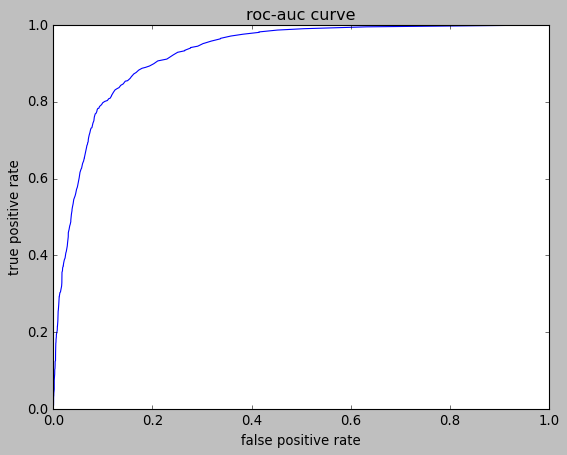

In [204]:
display_roc_auc(X_test,y_test,Random)

# RandomizedSearchCV

In [206]:
from sklearn.model_selection import RandomizedSearchCV

In [207]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [208]:
from sklearn.ensemble import RandomForestRegressor
Randomclf1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
Randomclf1= RandomizedSearchCV(Randomclf,random_grid)
# Fit the random search model
Randomclf1.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=290, n_jobs=-1,
                                                    oob_score=True,
                                                    random_state=400),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

In [214]:
#clf1random.best_params_
#clf1random.best_score_
#clf1random.best_estimator_

In [215]:
Randomclf1.best_params_


{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [216]:
Randomclf1.best_score_

0.9112820325791697

In [217]:
Randomclf1.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=130,
                       n_jobs=-1, oob_score=True, random_state=400)

In [218]:
display_metrics(X_test,y_test,Randomclf1)

Confusion matrix:
 [[6362  221]
 [ 439  395]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6583
           1       0.64      0.47      0.54       834

    accuracy                           0.91      7417
   macro avg       0.79      0.72      0.75      7417
weighted avg       0.90      0.91      0.91      7417

Accuracy: 0.9110152352703249


# oversampling

In [219]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [220]:
sm = SMOTE(random_state=2)
xtrain_sm, ytrain_sm = sm.fit_resample(X_train, y_train.ravel())
print('Number of rows before oversampling:{}'.format(Counter(y_train)))
print('Number of rows after oversampling: {}'.format(Counter(ytrain_sm)))

Number of rows before oversampling:Counter({0: 26293, 1: 3374})
Number of rows after oversampling: Counter({0: 26293, 1: 26293})


In [221]:
Randomclf_os=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
Randomclf_os.fit(xtrain_sm,ytrain_sm)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [222]:
Randomclf_os.score(X_test,y_test)

0.9076446002426857

In [223]:
display_metrics(X_test,y_test,Randomclf_os)

Confusion matrix:
 [[6223  360]
 [ 325  509]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6583
           1       0.59      0.61      0.60       834

    accuracy                           0.91      7417
   macro avg       0.77      0.78      0.77      7417
weighted avg       0.91      0.91      0.91      7417

Accuracy: 0.9076446002426857
